<a href="https://colab.research.google.com/github/lourencocavalcante/Introduction-to-Data-Science/blob/main/CAP394_2022_Fase1_Pre_Processando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/logoinpe.png?raw=true" width = 500 align="left">](https://www.gov.br/inpe/pt-br)

[<img src="https://github.com/lourencocavalcante/LogosINPE/blob/main/LogoCAP.png?raw=true" width = 300 align="right">](http://www.inpe.br/posgraduacao/cap/)

# <span style="color:#336699">Análise Exploratória de Dados (EDA) para investigar ocorrência de valores não realísticos e a correlação entre os dados do disdrômetro RD80 e do radiômetro de microondas MP3000A</span>
<hr style="border:2px solid #0077b9;">

<br/>

<div style="text-align: center;font-size: 100%;">
    <b>CAP-394 – Introdução à Ciência de Dados</b>
    <br/>
    <b>Docentes:</b> Dr. Rafael Duarte Coelho dos Santos e Dr. Gilberto Ribeiro de Queiroz
    <br/><br/>
    <b>Discente:</b> Lourenço José Cavalcante Neto
    <br/>
    <b>E-mail:</b> <a href="mailto:lourenco.cavalcante@ifto.edu.b">lourenco.cavalcante@ifto.edu.br</a>

</div>

<br/>

<div style="text-align: justify;  margin-left: 20%; margin-right: 20%;">
<b>Objetivo: </b> O principal objetivo deste notebook é apresentar o Pré-processamento e análise básica de dados meteorológicos, considerando a aquisição, extração e inserção no ambiente de execução, manutenção, armazenamento, limpeza, processamento, preparação e arquitetura dos dados.
</div>

Este notebook também pode ser visualizado no diretório da disciplina CAP-394 no Github: https://github.com/lourencocavalcante/Introduction-to-Data-Science.git

# **Importação de módulos e bibliotecas**

Existem muitas bibliotecas que podem ser utilizadas para realizar o pré-processamento de dados. Entre elas podemos destacar a biblioteca **Pandas**. Trata-se de uma biblioteca para leitura, manipulação e análise de dados tabulados. Essa biblioteca oferece estruturas de dados e operações para manipular conjuntos massivos de tabelas numéricas e séries temporais de forma otimizada. No python, por convensão, as bibliotecas são importadas conforme podemos ver na célula abaixo:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import math
import calendar
import datetime

# **Dataset**

Os dados meteorológicos são oriundos de dois equipamentos (**Radiômetro de Microondas "MP3000A"** e o **Disdrômetro "RD80"**), ambos instalados próximo à torre ATTO, em um sítio chamado Campina, na região Amazônica. O MP3000A mede diversas variáveis ambiente, entre elas a radiância no espectro de onda do microonda em diversos canais e estimativas de parâmetros de nuvens. Já o RD80 mede a distribuição das gotas de chuva que chegam à superfície.

Os dados compreendem o período de 17 de março de 2020 a 07 julho 2022.

Temos quatro tipos de arquivos:

**level1_output_sfc.txt**: 
Neste arquivo estão os dados do ambiente próximo à superfície.

**level1_output_bt.txt**: 
Neste arquivos estão os dados das medidas dos canais do microonda.

**level2_output_cld_atto.txt**: 
Neste arquivo estão as variáveis estimadas associadas a parâmetros de nuvens.

**JWD_campina_report_RZLwcDmDtNdrop_b2.1_report.txt**: 
Neste arquivo estão dados de medida da distribuição das gotas de chuva que chegam à superfície.

## **Obtendo os arquivos**

In [2]:
#Vamos baixar os dados do Google Drive para o Notebook

!gdown --id 1DflICrG3vlewOXnLYrsEqhK0WFn2Bz0U #Down. WD_campina_report_RZLwcDmDtNdrop_b2.1_report
!gdown --id 1HF3z0QjMhbOMMzvzhGLHmVHg0D6GQx5d #Down. level1_output_sfc
!gdown --id 1exlLcdlPzLOPhzC9l97TNlMnysEH0AWk #Down. level1_output_bt
!gdown --id 1suHWSYCt_3066gmPylMU9un9owYI3yVD #Down. level2_output_cld_atto

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1DflICrG3vlewOXnLYrsEqhK0WFn2Bz0U
To: /content/JWD_campina_report_RZLwcDmDtNdrop_b2.1_report.txt
100% 147M/147M [00:00<00:00, 158MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1HF3z0QjMhbOMMzvzhGLHmVHg0D6GQx5d
To: /content/level1_output_sfc.txt
100% 69.7M/69.7M [00:00<00:00, 299MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  cate

Com o objetivo de facilitar a leitura dos dados e torná-los **tidy**, primeiramente será necessário carregá-los como um **dataframe**. Vamos carregar os dados e criar os dataframes:

In [3]:
#Abrindo os dados e criando os Dataframes
df_rd80_joss = pd.read_table('./JWD_campina_report_RZLwcDmDtNdrop_b2.1_report.txt',header=None, delim_whitespace=True)
df_mp3000A_1 = pd.read_table('./level1_output_sfc.txt',header=None,delim_whitespace=True)
df_mp3000A_2 = pd.read_table('./level1_output_bt.txt',header=None,delim_whitespace=True)
df_mp3000A_3 = pd.read_table('./level2_output_cld_atto.txt',header=None,delim_whitespace=True)

Vamos criar uma lista contendo os Dataframes para que possamos manipulá-los a partir daqui.

In [4]:
list_dataframes = [df_rd80_joss, df_mp3000A_1, df_mp3000A_2, df_mp3000A_3]

## **Entendendo os dados**
Vamos verificar o tamanho dos Datasets e visualizar as suas colunas.

In [6]:
#Tamanho dos Datasets
print('TAMANHO:\n')
for item in list_dataframes:
  print('Tamanho do dataset: ',item.shape[0], ' - Quantidade de atributos: ', item.shape[1])

TAMANHO:

Tamanho do dataset:  315420  - Quantidade de atributos:  31
Tamanho do dataset:  639828  - Quantidade de atributos:  12
Tamanho do dataset:  639694  - Quantidade de atributos:  29
Tamanho do dataset:  639542  - Quantidade de atributos:  10


Agora vamos investigar mais algumas informações sobre nossos dados:

In [8]:
for itemDtypes in list_dataframes:
  print(itemDtypes.info(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315420 entries, 0 to 315419
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       315420 non-null  float64
 1   1       315420 non-null  float64
 2   2       315420 non-null  float64
 3   3       315420 non-null  float64
 4   4       315420 non-null  float64
 5   5       315420 non-null  float64
 6   6       315420 non-null  float64
 7   7       315420 non-null  float64
 8   8       315420 non-null  float64
 9   9       315420 non-null  float64
 10  10      315420 non-null  float64
 11  11      315420 non-null  float64
 12  12      315420 non-null  float64
 13  13      315420 non-null  float64
 14  14      315420 non-null  float64
 15  15      315420 non-null  float64
 16  16      315420 non-null  float64
 17  17      315420 non-null  float64
 18  18      315420 non-null  float64
 19  19      315420 non-null  float64
 20  20      315420 non-null  float64
 21  21      31

## **Visualização rápida dos dados**

In [9]:
#Visualização das primeiras 3 linhas e últimas 3 linhas
df_rd80_joss.head(n=3).append(df_rd80_joss.tail(n=3))

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,2020.0,3.0,17.0,13.0,52.0,0.0,0.00000,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020.0,3.0,17.0,13.0,53.0,0.0,0.00000,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020.0,3.0,17.0,13.0,54.0,0.0,0.00000,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315417,2022.0,6.0,29.0,9.0,7.0,0.0,0.00558,0.12418,0.00095,0.40371,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315418,2022.0,6.0,29.0,9.0,8.0,0.0,0.00497,0.10235,0.00088,0.38777,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
315419,2022.0,6.0,29.0,9.0,9.0,0.0,0.00000,0.00000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#Visualização das primeiras 3 linhas e últimas 3 linhas
df_mp3000A_1.head(n=3).append(df_mp3000A_1.tail(n=3))

,0,1,2,3,4,5,6,7,8,9,10,11
0,7.0,27.0,21.0,18.0,13.0,14.0,294.66,59.58,1007.91,300.24,0.0,1.0
1,7.0,27.0,21.0,18.0,13.0,47.0,294.61,59.31,1008.01,300.23,0.0,1.0
2,7.0,27.0,21.0,18.0,14.0,20.0,294.61,59.00,1007.91,300.08,0.0,1.0
639825,6.0,1.0,22.0,9.0,18.0,54.0,296.92,97.02,1006.81,294.13,0.0,1.0
639826,6.0,1.0,22.0,9.0,19.0,28.0,296.90,97.12,1006.81,294.07,0.0,1.0
639827,6.0,1.0,22.0,9.0,20.0,2.0,296.90,97.12,1006.71,293.81,0.0,1.0


In [11]:
#Visualização das primeiras 3 linhas e últimas 3 linhas
df_mp3000A_2.head(n=3).append(df_mp3000A_2.tail(n=3))

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,7.0,27.0,21.0,18.0,13.0,43.0,299.553,298.792,299.311,299.058,...,300.183,300.143,299.012,299.483,299.548,299.959,299.148,299.191,297.988,1.0
1,7.0,27.0,21.0,18.0,14.0,16.0,298.621,297.995,298.545,298.243,...,300.666,300.709,300.292,300.012,299.761,299.947,300.099,300.532,299.782,1.0
2,7.0,27.0,21.0,18.0,14.0,49.0,298.661,298.165,298.656,298.803,...,300.163,299.355,299.336,299.576,299.548,300.128,300.154,300.136,299.668,1.0
639691,6.0,1.0,22.0,9.0,18.0,51.0,64.936,63.554,55.201,50.706,...,257.767,278.936,286.974,289.723,291.697,292.569,291.686,292.493,292.344,1.0
639692,6.0,1.0,22.0,9.0,19.0,24.0,65.290,62.837,55.538,50.678,...,258.137,279.318,287.624,290.941,290.921,292.366,291.882,293.362,293.898,1.0
639693,6.0,1.0,22.0,9.0,19.0,57.0,64.701,63.214,55.056,50.426,...,257.485,279.108,288.287,290.856,292.084,292.356,293.001,293.633,292.026,1.0


In [12]:
#Visualização das primeiras 3 linhas e últimas 3 linhas
df_mp3000A_3.head(n=3).append(df_mp3000A_3.tail(n=3))

,0,1,2,3,4,5,6,7,8,9
0,7.0,27.0,21.0,18.0,13.0,45.0,11.642,19.680,0.0,1.0
1,7.0,27.0,21.0,18.0,14.0,18.0,11.523,19.684,0.2,1.0
2,7.0,27.0,21.0,18.0,14.0,50.0,11.544,19.686,0.2,1.0
639539,6.0,1.0,22.0,9.0,18.0,52.0,4.299,0.000,0.0,1.0
639540,6.0,1.0,22.0,9.0,19.0,26.0,5.400,0.000,0.0,1.0
639541,6.0,1.0,22.0,9.0,19.0,59.0,4.176,0.000,0.0,1.0


Como vimos, a colunas de dados não vieram com seus nomes. Vamos resolver isso adicionando nome para as colunas dos dados do instrumento rd80, de acordo com as especificações recebidas juntamente com os dados, executando a célula abaixo:

In [13]:
#Vamos adicionar os títulos das colunas:
df_rd80_joss.columns = ['Ano', 'Mes', 'dia', 'H', 'M', 'S','Rain_Intensity_mm_h', 'radar_reflectivity_1_mm6m3','Liquid_watercontent_g_m3',
'Mean_weight_diameter_mm', 'Time_integration_s', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D']

df_mp3000A_1.columns = ['Mes', 'dia', 'Ano', 'H', 'M', 'S', 'Tamb_K', 'Rh_percent', 'Pres_mb', 'Tir_K', 'Rain', 'DataQuality']

df_mp3000A_2.columns = ['Mes', 'dia', 'Ano', 'H', 'M', 'S', 'Ch_22_234', 'Ch_22_500', 'Ch_23_034', 'Ch_23_834', 'Ch_25_000', 'Ch_26_234', 'Ch_28_000', 'Ch_30_000', 'Ch_51_248', 'Ch_51_760', 'Ch_52_280', 'Ch_52_804', 'Ch_53_336', 'Ch_53_848', 'Ch_54_400', 'Ch_54_940', 'Ch_55_500', 'Ch_56_020', 'Ch_56_660', 'Ch_57_288', 'Ch_57_964', 'Ch_58_800', 'DataQuality']

df_mp3000A_3.columns = ['Mes', 'dia', 'Ano', 'H', 'M', 'S', 'Int_Vapor_cm','Int_Liquid_mm','Cloud_Base_km','DataQuality']

Aqui adicionamos a coluna Datetime para cada um dos Dataframes, com os dados de data e hora. Primeiramente vamos converter o tipo dos dados de data e hora para (int), para que possamos manipulá-los na criação da coluna Datetime, e em seguida adicionaremos a coluna Datetime.

In [14]:
#Modificanto o tipo de dado para (int)
df_rd80_joss[['Ano', 'Mes', 'dia', 'H', 'M', 'S']] = df_rd80_joss[['Ano', 'Mes', 'dia', 'H', 'M', 'S']].astype(int)
df_mp3000A_1[['Mes', 'dia', 'Ano', 'H', 'M', 'S']] = df_mp3000A_1[['Mes', 'dia', 'Ano', 'H', 'M', 'S']].astype(int)
df_mp3000A_2[['Mes', 'dia', 'Ano', 'H', 'M', 'S']] = df_mp3000A_2[['Mes', 'dia', 'Ano', 'H', 'M', 'S']].astype(int)
df_mp3000A_3[['Mes', 'dia', 'Ano', 'H', 'M', 'S']] = df_mp3000A_3[['Mes', 'dia', 'Ano', 'H', 'M', 'S']].astype(int)

Adicionando a coluna Datetime nos Dataframes.

In [15]:
#Adiciona a coluna Datetime ao Dataframe com os dados do RD80 (Joss)
df_rd80_joss['Datetime'] = df_rd80_joss[['Ano', 'Mes', 'dia', 'H', 'M', 'S']].apply(lambda row:
                    datetime.datetime(year=row['Ano'], month=row['Mes'],day=row['dia'], hour=row['H'], minute=row["M"], second=row["S"]),axis=1)

#Caso queiramos definir a coluna 'Datetime' como Índice
#df_rd80_joss = df_rd80_joss.set_index('Datetime')

In [ ]:
list_datasets_mp3000A = [df_mp3000A_1, df_mp3000A_2, df_mp3000A_3]

#Loop para percorrer a lista de Dataframes e realizar as manipulações com um único bloco de código.
for itemMP3000A in list_datasets_mp3000A:

  #Faz uma busca na coluna Ano e altera o ano de YY para YYYY
  itemMP3000A['Ano'][itemMP3000A['Ano'] < 2000] = itemMP3000A['Ano'] + 2000

  #Adiciona a coluna Datetime ao Dataframe da vez no Loop for
  itemMP3000A['Datetime'] = itemMP3000A[['Mes', 'dia', 'Ano', 'H', 'M', 'S']].apply(lambda row:
                    datetime.datetime(year=row['Ano'], month=row['Mes'],day=row['dia'], hour=row['H'], minute=row["M"], second=row["S"]),axis=1)
  
  #Caso queiramos definir a coluna 'Datetime' como Índice
  #itemMP3000A = itemMP3000A.set_index('Datetime')

Após os ajustes nas colunas dos Dataframes, podemos finalizar esta etapa removendo as colunas nas quais não iremos utilizar a partir daqui.

In [17]:
#Vamos remover as colunas que não iremos utilizar

df_rd80_joss = df_rd80_joss.drop(columns=['Mes', 'dia', 'Ano', 'H', 'M', 'S','N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D',
       'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D', 'N_D',
       'N_D', 'N_D', 'N_D'])

df_mp3000A_1 = df_mp3000A_1.drop(columns=['Mes', 'dia', 'Ano', 'H', 'M', 'S', 'Rain'])
df_mp3000A_2 = df_mp3000A_2.drop(columns=['Mes', 'dia', 'Ano', 'H', 'M', 'S'])
df_mp3000A_3 = df_mp3000A_3.drop(columns=['Mes', 'dia', 'Ano', 'H', 'M', 'S'])

Agora vamos juntar os dados do RD80 e do mp3000A no mesmo Dataframe:

In [23]:
df_MP3000A = pd.merge(df_mp3000A_1,df_mp3000A_2, how='outer', on = ['Datetime','DataQuality'])
df_MP3000A_final = pd.merge(df_MP3000A, df_mp3000A_3, how='outer', on = ['Datetime','DataQuality'])

#df_MP3000A_RD80_final = pd.merge(df_rd80_joss, df_MP3000A_final, how='outer', on = ['Datetime'])

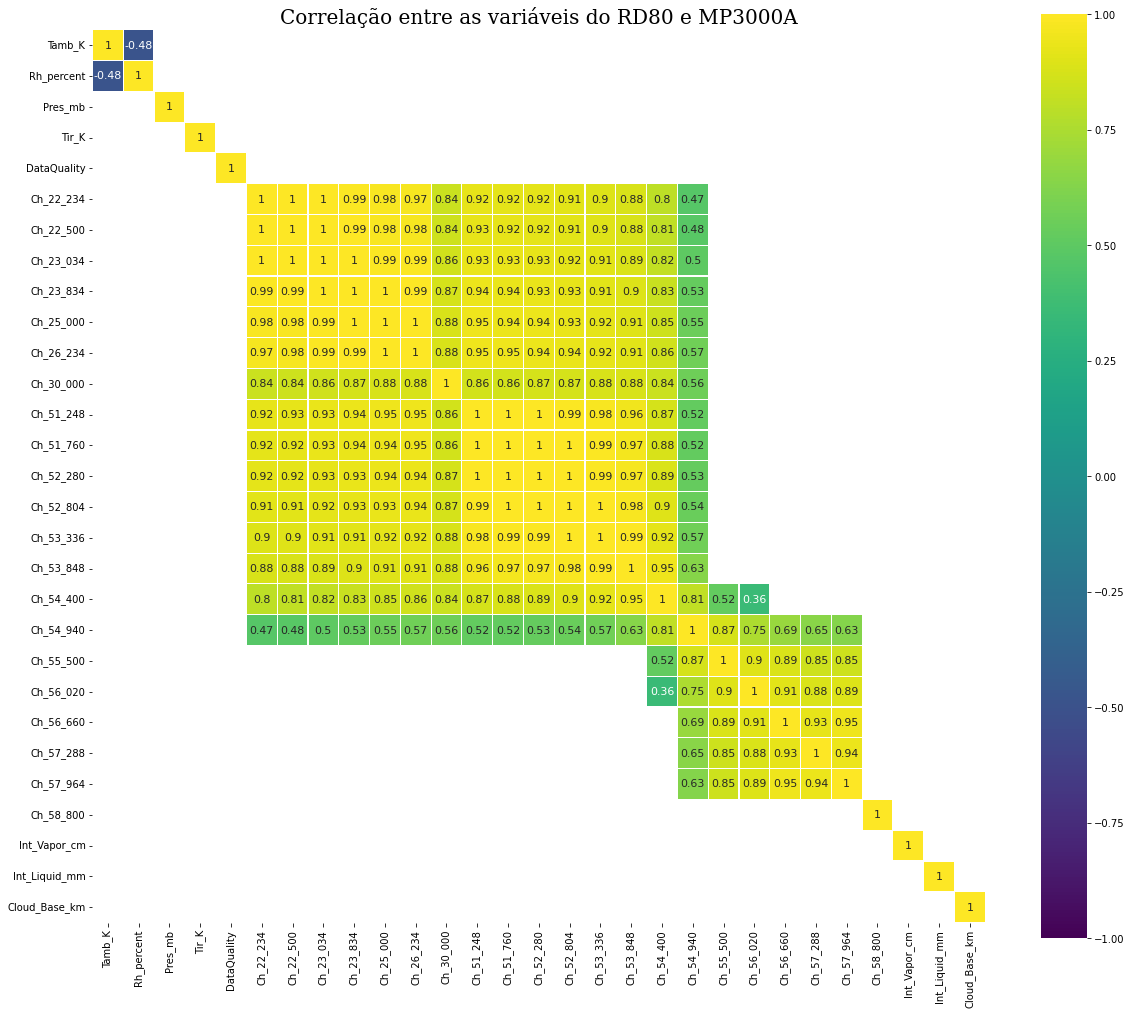

In [26]:
corr = df_MP3000A_final.corr()
plt.figure(figsize=(20, 17))
plt.title('Correlação entre as variáveis do RD80 e MP3000A', fontsize=20, fontfamily='serif')
sns.heatmap(corr[(corr >= 0.30) | (corr <= -0.30)],cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 11}, square=True);

Detectando e corrigindo os valores nulos (**NaN**) em nossos dados

In [ ]:
#Verificar existência de valores nulos (NaN)
for itemDtypes in list_dataframes:
  print('\n\nVerificação de existência de valores nulos (NaN)')
  print(itemDtypes.isna().sum())

# **Referências**
ROSE, T.; CREWELL, S.; LÖHNERT, U.; SIMMER, C. A network suitable microwave radiometer for operational monitoring of the cloudy atmosphere, Atmos. Res., 75, 183–200, 2005.

Tukey, John (1977). Exploratory Data Analysis. Addison-Wesley Publishing Company.

https://cienciadedadosuff.github.io/cursos/notebooks/caderno-3.html